In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

insurance_df = pd.read_csv("../Data/insurance.csv").sample(500)

In [32]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
444,56,male,26.695,1,yes,northwest,26109.32905
1307,32,male,28.120,4,yes,northwest,21472.47880
411,44,female,20.235,1,yes,northeast,19594.80965
1236,63,female,21.660,0,no,northeast,14449.85440
1160,43,female,34.580,1,no,northwest,7727.25320


In [33]:
## Introducing Random columns will not decrease R-squared

import numpy as np

rng = np.random.default_rng(12345)

insurance_df = insurance_df.assign(
    rand_col = rng.random(len(insurance_df)),
    rand_col2 = rng.random(len(insurance_df)),
    rand_col3 = rng.random(len(insurance_df)),
)

In [34]:
insurance_df.corr(numeric_only=True)

,age,bmi,children,charges,rand_col,rand_col2,rand_col3
age,1.000000,0.071165,0.051013,0.369539,0.026120,0.023318,-0.070752
bmi,0.071165,1.000000,0.016431,0.144019,-0.003547,-0.015641,0.003071
children,0.051013,0.016431,1.000000,0.081306,-0.008956,0.005173,0.030251
charges,0.369539,0.144019,0.081306,1.000000,-0.017287,0.043174,-0.071664
rand_col,0.026120,-0.003547,-0.008956,-0.017287,1.000000,0.038770,0.024753
rand_col2,0.023318,-0.015641,0.005173,0.043174,0.038770,1.000000,-0.010785
rand_col3,-0.070752,0.003071,0.030251,-0.071664,0.024753,-0.010785,1.000000


In [35]:
features = [
    "age", 
    "bmi", 
     "children",
      "rand_col",
     "rand_col2",
    "rand_col3"
]

X = sm.add_constant(insurance_df[features])
y = insurance_df["charges"]

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     15.48
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           2.68e-16
Time:                        13:11:34   Log-Likelihood:                -5337.2
No. Observations:                 500   AIC:                         1.069e+04
Df Residuals:                     493   BIC:                         1.072e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5402.5512   3067.154     -1.761      0.079   -1.14e+04     623.755
age          286.6183     33.654      8.517      0.000     220.495     352.741
bmi          230.1596     80.530      2.858      0.004      71.935     388.385
children     584.5607    388.394      1.505      0.133    -178.551    1347.672
rand_col   -1027.1122   1646.396     -0.624      0.533   -4261.931    2207.707
rand_col2   1507.0817   1688.189      0.893      0.372   -1809.851    4824.014
rand_col3  -1886.3269   1636.010     -1.153      0.249   -5100.739    1328.085
==============================================================================
Omnibus:                      141.353   Durbin-Watson:                   2.083
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              273.963
Skew:                           1.631   Prob(JB):                     3.23e-60
Kurtosis:                       4.585   Cond. No.                         342.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
!git add 03_multiple_regression_demos.ipynb
!git commit -m "multiple_regression_demos-1"
!git push origin master

[master 97b9536] multiple_regression_demos-1
 1 file changed, 184 insertions(+), 82 deletions(-)
Enumerating objects: 11, done.
Counting objects: 100% (11/11), done.
Delta compression using up to 22 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 2.91 KiB | 992.00 KiB/s, done.
Total 6 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To github.com:Proftg/Maven-regression.git
   6bff651..97b9536  master -> master


### Metrics

In [40]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse
from sklearn.metrics import r2_score as r2

print(f"MAE: {mae(y, model.predict())}")
print(f"RMSE: {rmse(y, model.predict()) ** (1/2)}")
print(f"R2: {r2(y, model.predict())}")


MAE: 8214.289121711994
RMSE: 10462.48440684904
R2: 0.15853696809902307


<Axes: ylabel='None'>

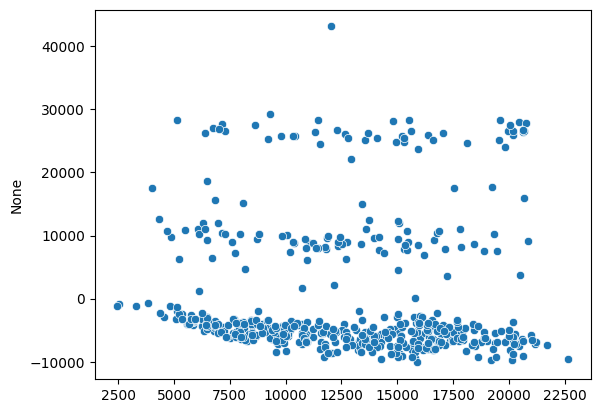

In [38]:
sns.scatterplot(x=model.predict(), y=model.resid)

### Making Predictions

In [20]:
new_data = pd.DataFrame({
    "age": [0, insurance_df["age"].min(), insurance_df["age"].mean(), insurance_df["age"].max()],
    "bmi": [0, insurance_df["bmi"].min(), insurance_df["bmi"].mean(), insurance_df["bmi"].max()],
})

new_data

,age,bmi
0,0.000000,0.000000
1,18.000000,15.960000
2,39.207025,30.663397
3,64.000000,53.130000


In [21]:
X = sm.add_constant(new_data)

model.predict(X)

0    -6424.804612
1     3244.072239
2    13270.422265
3    26749.200448
dtype: float64

In [22]:
insurance_df = insurance_df.assign(
    smoker_flag=np.where(insurance_df["smoker"] == "yes", 1, 0),
    female_flag=np.where(insurance_df["sex"] == "female", 1, 0)
)

X = sm.add_constant(insurance_df[["age", "bmi", "children", "smoker_flag"]])
y = insurance_df["charges"]

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                        14:10:15   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -1.21e+04    941.984    -12.848      0.000    -1.4e+04   -1.03e+04
age           257.8495     11.896     21.675      0.000     234.512     281.187
bmi           321.8514     27.378     11.756      0.000     268.143     375.559
children      473.5023    137.792      3.436      0.001     203.190     743.814
smoker_flag  2.381e+04    411.220     57.904      0.000     2.3e+04    2.46e+04
==============================================================================
Omnibus:                      301.480   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              722.157
Skew:                           1.215   Prob(JB):                    1.53e-157
Kurtosis:                       5.654   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[(-13000.0, 50000.0)]

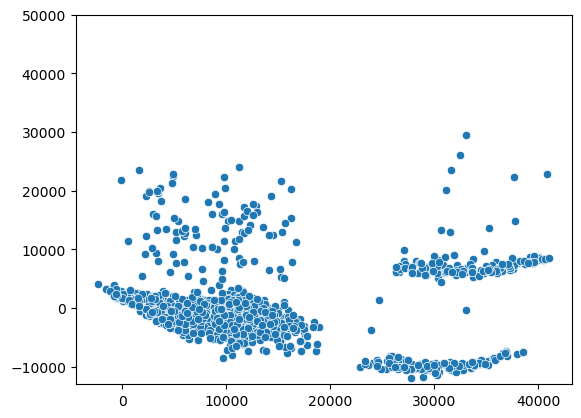

In [23]:
sns.scatterplot(x=model.predict(), y=model.resid).set(ylim=(-13000, 50000) )

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

print(f"MAE: {mae(y, model.predict())}")
print(f"RMSE: {mse(y, model.predict(), squared=False)}")
print(f"R2: {r2(y, model.predict())}")
print(f"\n=== Interprétation ===")
print(f"Ce modèle explique {r2(y, model.predict())*100:.1f}% de la variance des charges d'assurance")

In [ ]:
## Comparaison des deux modèles

import pandas as pd

results_comparison = pd.DataFrame({
    "Métrique": ["R²", "R² Ajusté", "MAE", "RMSE", "F-statistic", "Prob (F-stat)"],
    "Modèle 1\n(avec colonnes aléatoires)": ["0.159", "0.148", "8214.29", "10462.48", "15.48", "2.68e-16"],
    "Modèle 2\n(age, bmi, children, smoker)": ["0.750", "0.749", "?", "?", "998.1", "0.00"]
})

print(results_comparison.to_string(index=False))
print("\n✅ MODÈLE 2 EST BEAUCOUP MIEUX !")
print("   - R² 4.7x plus élevé (0.750 vs 0.159)")
print("   - Explique 75% de la variance vs 16%")

In [ ]:
## Pourquoi smoker_flag est si puissant ?

# Corrélation avec la cible
print("Corrélations avec les charges :")
print(f"age:         {insurance_df['age'].corr(insurance_df['charges']):.3f}")
print(f"bmi:         {insurance_df['bmi'].corr(insurance_df['charges']):.3f}")
print(f"children:    {insurance_df['children'].corr(insurance_df['charges']):.3f}")
print(f"smoker_flag: {insurance_df['smoker_flag'].corr(insurance_df['charges']):.3f}  ⭐ TRÈS FORTE !")

print("\n" + "="*60)
print("COMPRENDRE : Pourquoi R² change tellement ?")
print("="*60)
print("\nModèle 1 : Variables faibles (age, bmi, children) + colonnes aléatoires")
print("  → R² = 0.159 (explique 16% seulement)")
print("\nModèle 2 : Variables faibles (age, bmi, children) + smoker_flag PUISSANT")
print("  → R² = 0.750 (explique 75% !)")
print("\n🔑 Leçon : C'est pas juste d'ajouter des variables,")
print("   c'est d'ajouter les BONNES variables !")